<a href="https://colab.research.google.com/github/lyloc-logtech/ai-code/blob/main/CNN-duancuoiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (224, 224)

train_dir = '/content/drive/MyDrive/AI homework/train'
val_dir = '/content/drive/MyDrive/AI homework/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze các layer ban đầu
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 lớp: ok / defect

model = Model(inputs=base_model.input, outputs=predictions)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 3163s 15s/step - accuracy: 0.5323 - loss: 0.7678 - val_accuracy: 0.6951 - val_loss: 0.6316
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 107s 514ms/step - accuracy: 0.5566 - loss: 0.6838 - val_accuracy: 0.6979 - val_loss: 0.6324
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 108s 518ms/step - accuracy: 0.6043 - loss: 0.6593 - val_accuracy: 0.7035 - val_loss: 0.5991
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 111s 531ms/step - accuracy: 0.6278 - loss: 0.6473 - val_accuracy: 0.7021 - val_loss: 0.5848
Epoch 5/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 108s 517ms/step - accuracy: 0.6183 - loss: 0.6631 - val_accuracy: 0.6923 - val_loss: 0.6084


In [5]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Lấy ánh xạ index → tên lớp
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

def predict_image(img_path):
    # Tải và tiền xử lý ảnh
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img) / 255.0              # Normalize
    img_array = np.expand_dims(img_array, axis=0)            # Thêm batch dimension

    # Dự đoán
    preds = model.predict(img_array)
    pred_index = np.argmax(preds)
    pred_label = idx_to_class[pred_index]
    pred_confidence = preds[0][pred_index]

    print(f"Prediction: {pred_label} (confidence: {pred_confidence:.2f})")
    return pred_label




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: defective (confidence: 0.77)


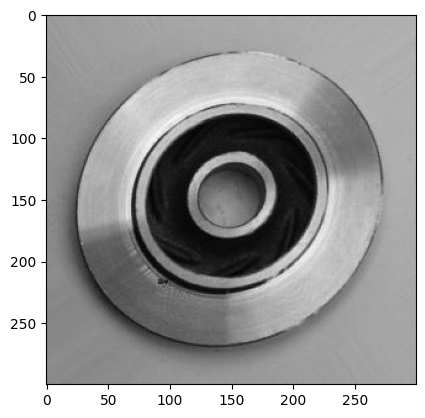

In [8]:
test_image_path = "/content/drive/MyDrive/AI homework/val/defective/val defective/cast_def_0_1059.jpeg"
result = predict_image(test_image_path)
plt.show()
plt.imshow(image.load_img(test_image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: ok (confidence: 0.69)


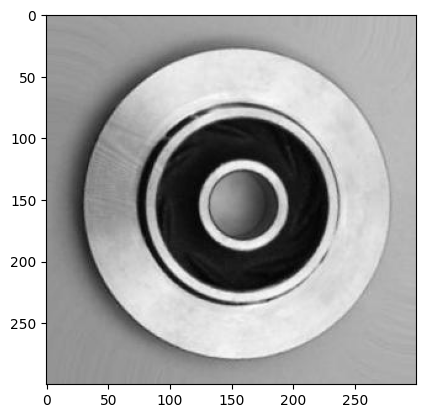

In [11]:
test_image_path = '/content/drive/MyDrive/AI homework/val/ok/lspahija simple-defect-detection main data-casting_data_val_ok/cast_ok_0_1003.jpeg'
result = predict_image(test_image_path)
plt.show()
plt.imshow(image.load_img(test_image_path))

In [7]:
import matplotlib.pyplot as plt